In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [171]:
NUM_CATEGORIES = 3

In [172]:
csv_files = glob.glob(f"data\\*")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [173]:
df

,gen,nevals,avg,stddev,min,max,run,representation
0,0,50,-979999.040200,139999.718600,-999999.000000,-1.010000,1,gp-2
1,1,45,-979999.040200,139999.718600,-999999.000000,-1.010000,1,gp-2
2,2,45,-859999.261467,346986.383418,-999999.000000,-0.013333,1,gp-2
3,3,49,-519999.905000,499598.897918,-999999.000000,-0.013333,1,gp-2
4,4,46,-380000.206433,485385.499486,-999999.000000,-0.013333,1,gp-2
...,...,...,...,...,...,...,...,...
3025,96,45,0.629373,0.336677,0.050296,1.140171,9,f1-native
3026,97,44,0.676140,0.315240,0.017000,1.140171,9,f1-native
3027,98,48,0.602101,0.319750,0.017783,1.145861,9,f1-native
3028,99,46,0.638147,0.321102,0.023930,1.100674,9,f1-native


In [174]:
df = df[df['max'] >= -2]

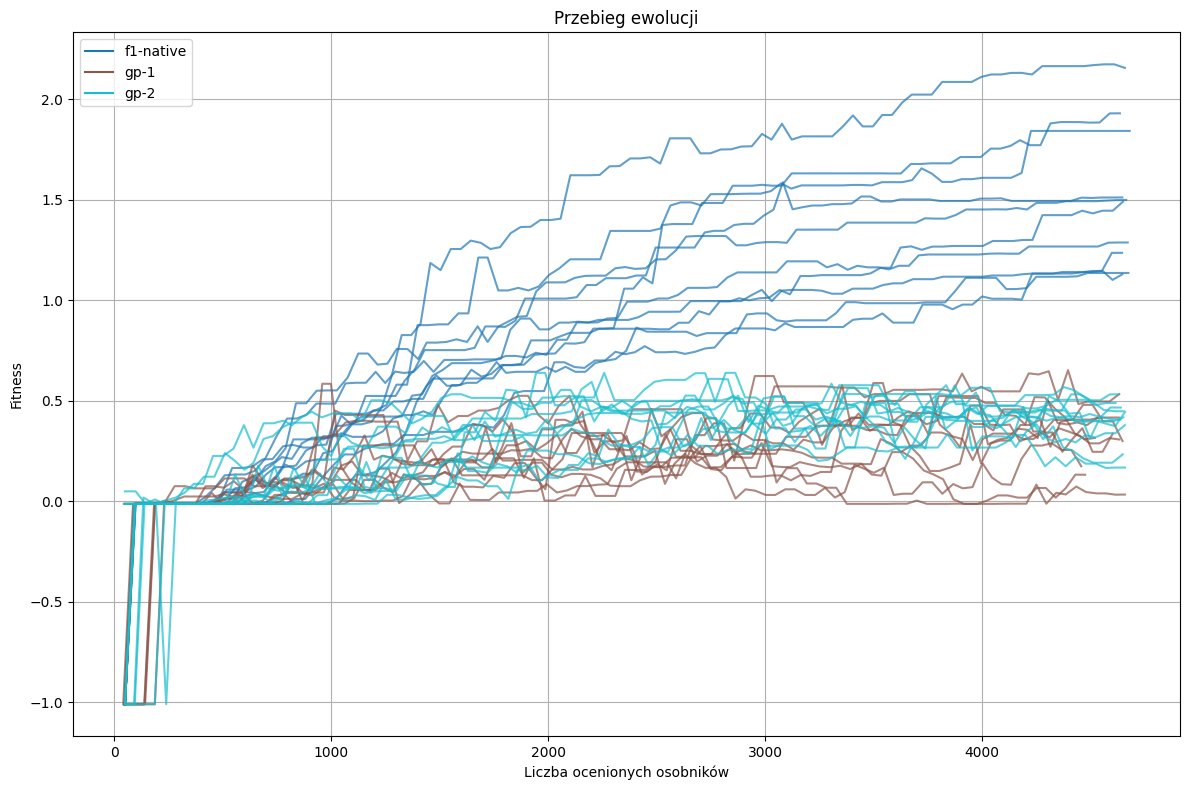

In [175]:
cmap = plt.cm.get_cmap('tab10', NUM_CATEGORIES)
colors = [cmap(i) for i in range(NUM_CATEGORIES)]
plt.figure(figsize=(12, 8))
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    for run_index, run_df in representation_runs_df.groupby('run'):
        plt.plot(run_df['nevals'].cumsum(), run_df['max'], alpha=0.7, color=colors[i])
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    plt.plot([], [], color=colors[i], label=f'{representation_value}')
plt.title('Przebieg ewolucji')
plt.xlabel('Liczba ocenionych osobników')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

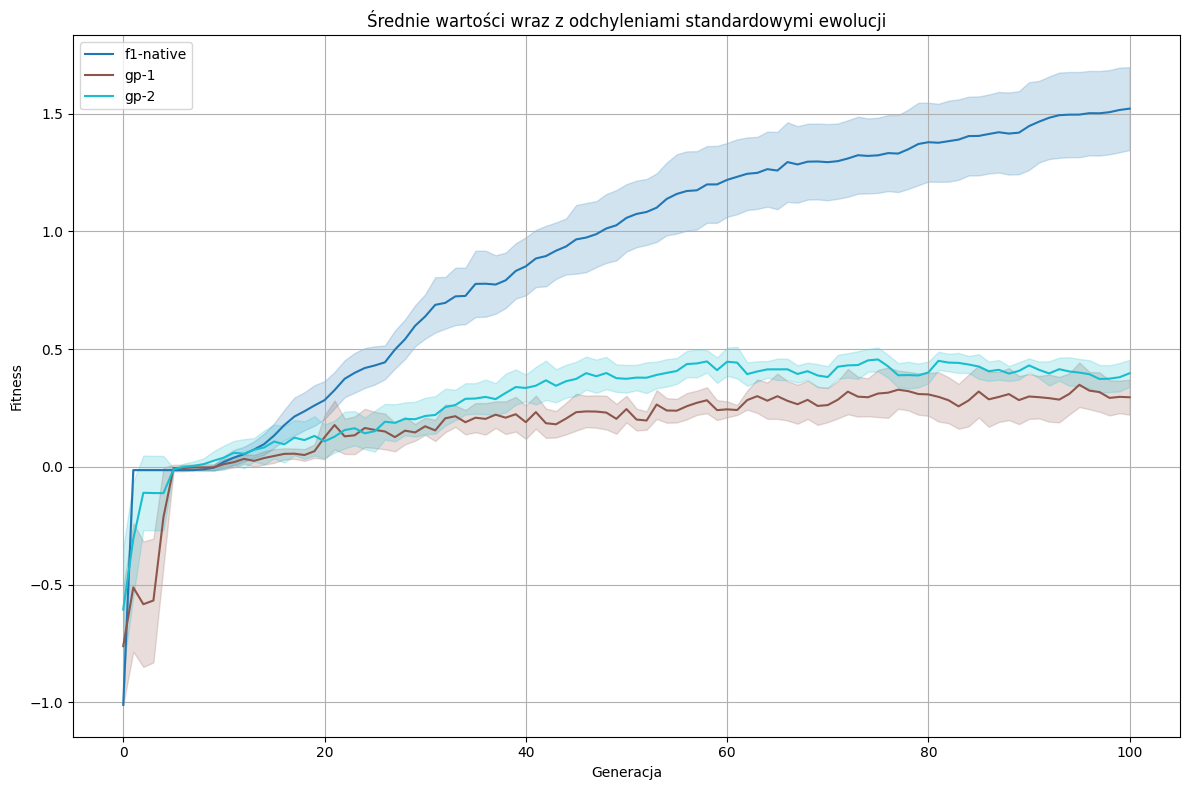

In [176]:
cmap = plt.cm.get_cmap('tab10', NUM_CATEGORIES)
colors = [cmap(i) for i in range(NUM_CATEGORIES)]
plt.figure(figsize=(12, 8))
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    mean_values = representation_runs_df.groupby('gen')['max'].mean().values
    std_values = representation_runs_df.groupby('gen')['max'].std().values
    gen_values = representation_runs_df.groupby('gen')['max'].mean().index

    plt.plot(gen_values, mean_values, color=colors[i])
    plt.fill_between(gen_values, mean_values - std_values/2, mean_values + std_values/2, color=colors[i], alpha=0.2)
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    plt.plot([], [], color=colors[i], label=f'{representation_value}')
plt.title('Średnie wartości wraz z odchyleniami standardowymi ewolucji')
plt.xlabel('Generacja')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
df.groupby('representation')

In [178]:
sorted(df['representation'].unique())

['f1-native', 'gp-1', 'gp-2']

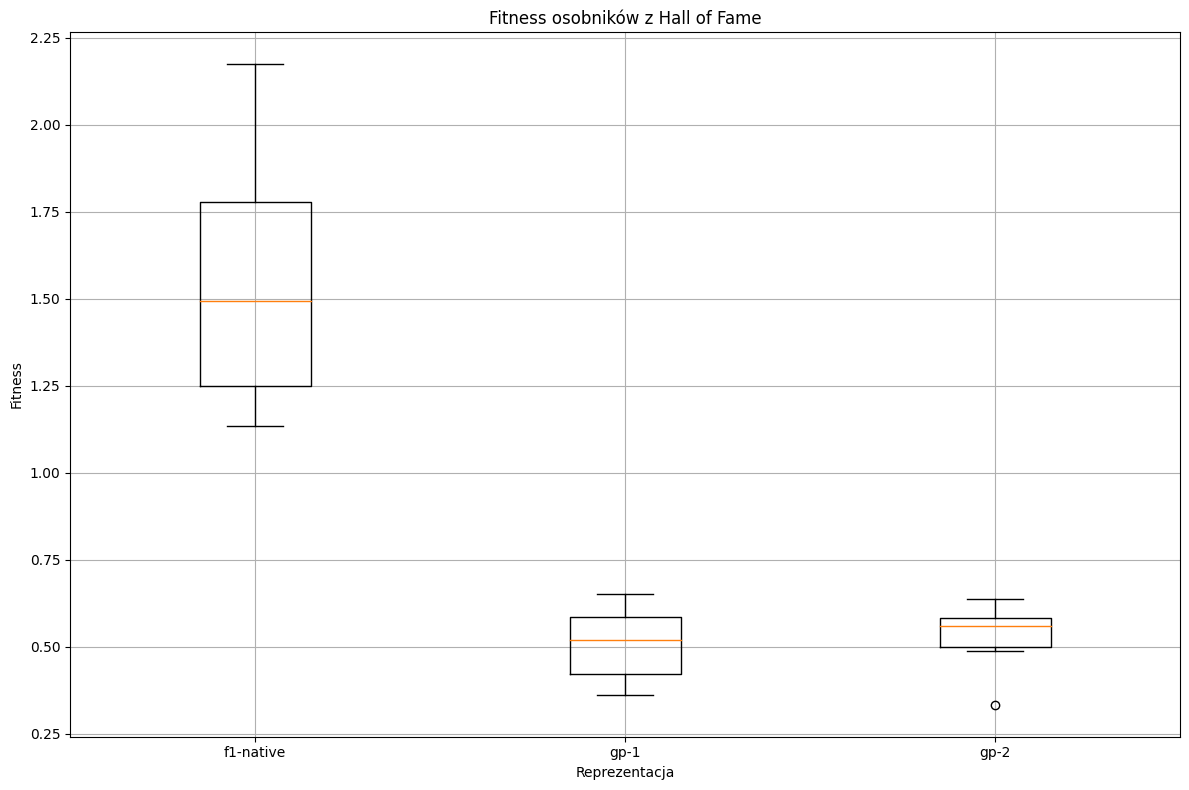

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create an empty list to store the data for each box plot
data = []
ticks = []

# Iterate over the grouped dataframe
for i, (representation_value, representation_runs_df) in enumerate(df.groupby('representation')):
    # Gather the max values for each run
    max_values = representation_runs_df.groupby('run')['max'].max().values
    ticks.append(representation_value)
    data.append(max_values)

# Create the box plots, with positions based on the index 'i'
plt.boxplot(data)

# Set x-axis labels for each box plot based on representation values
plt.xticks(range(1, len(ticks) + 1), ticks)
plt.title('Fitness osobników z Hall of Fame')
# Add axis labels
plt.xlabel('Reprezentacja')
plt.ylabel('Fitness')

# Display grid and adjust layout
plt.grid(True)
plt.tight_layout()
    
# Show the plot
plt.show()
